# 가설검정 연습문제
## 문제 1
당신은 매일 아침 동네 빵집에서 식빵을 구입해 왔다.

이 식빵의 무게는 500g이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 500g이 맞는지 의구심이 들기 시작한다. 그래서 1개월간 식빵을 사운 뒤 매일 무게를 기록하였고 그 결과는 아래의 데이터와 같다.


1개월간 측정한 빵의 평균 무게는 495.3g이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?

### 요구사항

1. 빵 무게의 95% 신뢰구간을 구하고 시각화 하시오.

2. 지금까지 당신이 구입한 빵의 평균 무게가 500g보다 작다면 컴플레인을 걸고자 한다. 컴플레인을 걸어야 할지 결정하시오.

In [18]:
import pandas as pd 
import scipy.stats
from scipy.stats import t
from matplotlib import pyplot as plt
import seaborn as sb    
import sys

In [3]:
df = pd.read_excel("https://data.hossam.kr/E02/bread.xlsx")
df

,무게
0,495
1,496
2,502
3,494
4,499
5,501
6,493
7,494
8,495
9,501


## #01. 신뢰구간 구하기

필요한 값 : 표본평균, 신뢰수준, 표본 표준편차 -> 표본 표준오차, 샘플수, 자유도 

In [6]:
import math

In [7]:
sample_mean = df['무게'].mean()
clevel = 0.95
sample_std = df['무게'].std(ddof=1)
n = len(df)
dof = n-1
sample_std_erorr = sample_std/math.sqrt(n)

신뢰구간 구하기

In [8]:
cmin,cmax = t.interval(clevel,dof,loc=sample_mean,scale = sample_std_erorr)
cmin,cmax

(494.03836792675105, 496.6949654065823)

## #02. 신뢰구간 시각화

In [9]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

<Axes: xlabel='무게', ylabel='Density'>

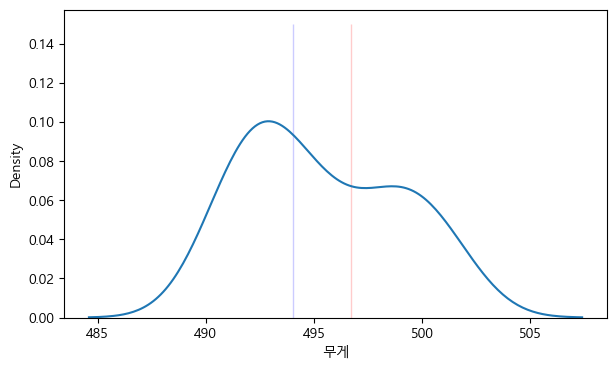

In [14]:
sb.kdeplot(data=df,x='무게')
sb.lineplot(x=[cmin,cmin],y=[0,0.15],color='blue')
sb.lineplot(x=[cmax,cmax],y=[0,0.15],color='red')

## #03. 가설검정 

귀무가설 : mu = 500
대립가설 : mu < 500


In [20]:
t,p = scipy.stats.ttest_1samp(df['무게'],500,alternative='less')
"t-statistics : {:,.3f}, p-value : {:,.4f}".format(t,p)

't-statistics : -7.134, p-value : 0.0000'

컴플레인 걸어야함